# Unit 5 - Financial Planning


In [60]:
# Initial imports
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [61]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [62]:
# Set current amount of crypto assets
btc_qty = 1.2
eth_qty = 5.3

btc_id = '1'
eth_id = '1027'
fx = 'USD'

In [63]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [64]:
# Fetch current BTC price
response_btc = requests.get(btc_url)

# Fetch current ETH price
response_eth = requests.get(eth_url)

# Compute current value of my crpto
content_btc = response_btc.json()

content_eth = response_eth.json()

btc_price = content_btc['data'][btc_id]['quotes'][fx]['price']
eth_price = content_eth['data'][eth_id]['quotes'][fx]['price']

btc_value = btc_price * btc_qty
eth_value = eth_price * eth_qty

# Print current crypto wallet balance
print(f"The current value of your {btc_qty} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_qty} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $15491.92
The current value of your 5.3 ETH is $2165.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [65]:
# Current amount of shares
agg_qty = 200
spy_qty = 50

In [66]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [67]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3483335  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38762783

In [68]:
# Pick AGG and SPY close price

agg_close_price = float(df_portfolio[tickers[0]]["close"])
spy_close_price = float(df_portfolio[tickers[1]]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [69]:
# Compute the current value of shares
agg_value = agg_close_price * agg_qty
spy_value = spy_close_price * spy_qty

# Print current value of share
print(f"The current value of your {agg_qty} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your {spy_qty} SPY shares is ${spy_value:0.2f}")

The current value of your 200 AGG shares is $23494.00
The current value of your 50 SPY shares is $17288.00


### Savings Health Analysis

In [72]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_savings = btc_value + eth_value
stock_savings = agg_value + spy_value

index = ['crypto', 'shares']

savings_dict = { 'amount' : [crypto_savings, stock_savings] }

df_savings = pd.DataFrame(savings_dict, index = index) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,17657.337
shares,40782.000


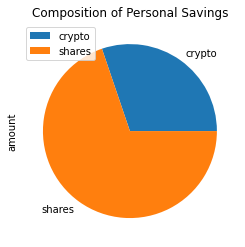

In [82]:
# Plot savings pie chart
fig, ax = plt.subplots(facecolor='white')
df_savings.plot(kind='pie', ax=ax, y='amount', title="Composition of Personal Savings")

In [84]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings['amount'].sum()

# Validate saving health
if(savings > emergency_fund + 10):
    print(f"Congratulations! You have enough money in your emergency fund.")
    
elif(savings <= emergency_fund + 10 and savings >= emergency_fund - 10):
    print(f"Congratulations! You have reached your emergency fund goals!")

else:
    print(f"You need at least ${savings - emergency_fund + 10:0.2f} more to reach your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [85]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

timeframe = "1D"

In [86]:
# Get 5 years' worth of historical data for SPY and AGG
df_five_years = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_five_years.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [92]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = df_five_years,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [93]:
# Printing the simulation input data
MC_40_60.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [94]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994560,0.995381,0.998378,1.008132,1.005189,0.995336,1.004811,1.006328,1.005564,0.990659,...,1.004704,0.983544,0.986966,1.000012,0.996229,1.006716,0.997277,0.993260,0.993300,0.995897
2,0.996100,1.004314,1.003688,1.015844,0.995141,1.004836,1.009353,0.995722,0.988103,0.980153,...,1.004559,0.993987,0.982281,1.002024,1.004483,1.007618,1.003525,1.004057,1.014568,0.995335
3,1.004136,1.016086,1.003260,1.017640,0.990462,1.004626,1.006332,0.988348,0.985144,0.973397,...,1.000274,0.998925,0.978765,1.019168,1.005363,1.022916,1.007943,1.015055,1.011063,1.001067
4,1.005385,1.014515,1.001245,1.017516,0.978705,1.001457,1.009675,0.980397,0.984827,0.971371,...,1.005839,0.993072,0.978385,1.015023,1.009028,1.010992,1.011277,1.010242,1.012646,1.003314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.777484,6.059778,16.343493,3.753624,5.081255,20.942872,10.208929,3.401741,18.875342,6.458761,...,7.810927,4.782060,8.795771,27.087300,12.758278,7.465404,6.989100,19.267797,5.096676,19.193363
7557,6.853605,6.164003,16.387038,3.764480,5.069202,20.685932,10.110186,3.367215,18.839280,6.461809,...,7.884109,4.750076,8.858647,26.926770,12.896041,7.512671,7.053495,19.329075,5.106975,19.065164
7558,6.895042,6.178984,16.380629,3.769947,5.090580,20.653860,10.228746,3.299630,18.852457,6.422824,...,7.934727,4.716494,8.780223,27.048744,12.928255,7.587610,7.162791,19.090529,5.136914,19.256676
7559,7.005216,6.248476,16.497476,3.757022,5.152602,20.972855,10.331179,3.322979,18.628132,6.445344,...,7.946554,4.717929,8.796219,27.250688,12.881533,7.648759,7.047932,19.067653,5.106084,19.164109


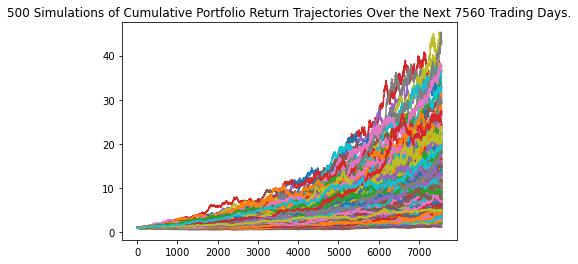

In [95]:
# Plot simulation outcomes
line_plot = MC_40_60.plot_simulation()

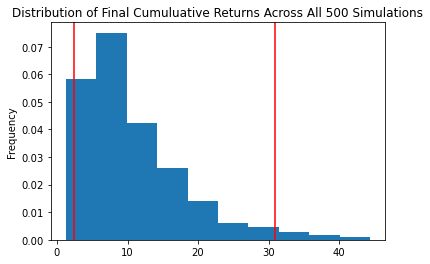

In [96]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60.plot_distribution()

### Retirement Analysis

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_40_60 = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(tbl_40_60)

count           500.000000
mean             10.654494
std               7.285480
min               1.247315
25%               5.533844
50%               8.576721
75%              13.927029
max              44.394904
95% CI Lower      2.367180
95% CI Upper     30.834874
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [99]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_40_60[8]*initial_investment,2)
ci_upper = round(tbl_40_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47343.59 and $616697.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [100]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl_40_60[8]*initial_investment,2)
ci_upper = round(tbl_40_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71015.39 and $925046.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [107]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# 90% equity, 10% fixed-income, over 5 years

MC_10_90_five_years = MCSimulation(
    portfolio_data = df_five_years,
    weights = [0.1, 0.9],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [108]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_10_90_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991832,0.989566,0.996815,0.993711,0.990556,0.988956,1.007799,0.990874,1.022379,1.002364,...,1.023979,1.000522,1.006724,0.999783,1.012692,0.984913,0.983840,0.994849,1.016128,1.006075
2,1.001828,0.986975,1.004768,0.992753,0.991913,0.984406,1.006258,1.002362,1.034919,1.006612,...,1.012661,0.997932,1.025619,0.998057,1.016104,0.987464,0.967135,1.000898,1.018826,0.990143
3,0.996268,0.997978,1.011748,0.994931,0.995514,0.989953,1.024692,0.992796,1.027427,1.002676,...,0.993021,1.001791,1.025701,0.980865,1.027002,0.974540,0.976869,1.023442,1.016370,1.001198
4,1.000959,1.005087,1.019578,0.993138,1.004943,0.993579,1.024166,0.989684,1.041943,1.018932,...,0.991967,0.999924,1.022021,0.983803,1.004887,0.963045,0.980658,1.020351,1.033467,0.998000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.162478,1.764367,3.717934,1.817414,2.285736,1.329463,1.211788,3.002253,1.099389,0.957117,...,0.387075,1.418302,1.840688,1.643912,1.464350,1.526173,1.362641,1.637772,2.463557,1.420183
1257,1.163413,1.759237,3.699172,1.773756,2.301270,1.323604,1.211204,3.014463,1.121977,0.959842,...,0.390159,1.422456,1.845367,1.683045,1.450611,1.521356,1.340534,1.627627,2.462863,1.445636
1258,1.148052,1.804128,3.683135,1.764574,2.307967,1.331350,1.197561,3.011804,1.115938,0.952683,...,0.386897,1.421346,1.823872,1.687596,1.451598,1.527297,1.340037,1.605762,2.463380,1.431538
1259,1.142724,1.775914,3.650792,1.808075,2.290945,1.329011,1.174805,3.012148,1.116790,0.962391,...,0.391220,1.417428,1.816417,1.724087,1.438612,1.506626,1.336278,1.611746,2.440335,1.429967


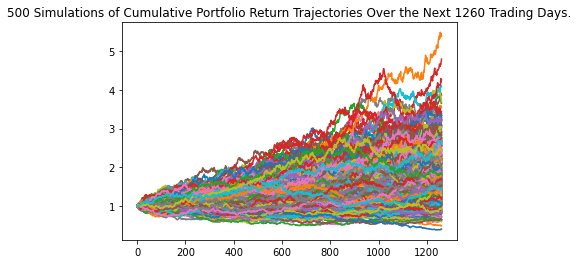

In [109]:
# Plot simulation outcomes
line_plot_five_years = MC_10_90_five_years.plot_simulation()

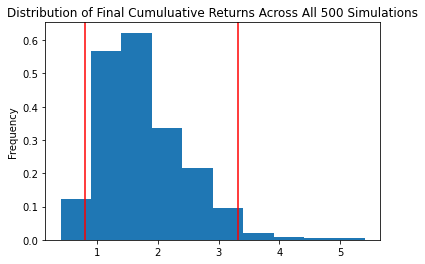

In [110]:
# Plot probability distribution and confidence intervals
dist_plot_five_years = MC_10_90_five_years.plot_distribution()

In [112]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10_90_five_years = MC_10_90_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_10_90_five_years)

count           500.000000
mean              1.755545
std               0.693747
min               0.397038
25%               1.260899
50%               1.630360
75%               2.142328
max               5.409819
95% CI Lower      0.806027
95% CI Upper      3.318503
Name: 1260, dtype: float64


In [113]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_10_90_five_years[8]*initial_investment,2)
ci_upper = round(tbl_10_90_five_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16120.54 and $66370.06


### Ten Years Retirement Option

In [115]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

# 90% equity, 10% fixed-income, over 10 years

MC_10_90_ten_years = MCSimulation(
    portfolio_data = df_five_years,
    weights = [0.1, 0.9],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [116]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_90_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015896,0.986062,0.997463,0.999019,0.996440,1.000593,1.003596,1.004701,1.007034,0.999664,...,0.996226,0.996234,0.994676,1.004840,1.005977,1.007296,1.020125,1.007370,1.016884,0.997554
2,1.014525,0.974454,0.986500,0.999786,0.997943,1.019453,1.001172,1.023804,1.021236,0.986708,...,0.983108,0.990124,0.984807,1.014452,0.998624,1.012972,1.032383,1.012831,0.986450,0.996648
3,1.033876,0.991170,0.982799,1.010493,1.006444,1.023179,0.987010,1.038089,1.005165,0.980415,...,0.977337,0.988882,1.002536,1.018286,1.012589,1.023699,1.022462,1.013343,0.982138,1.002406
4,1.036283,0.990014,0.985520,1.007353,1.002968,1.022968,0.976388,1.042951,1.018156,0.999925,...,0.985724,1.016440,0.996186,1.007609,1.009849,1.034293,0.996152,1.027893,0.983661,0.997000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.638324,2.543805,2.290259,2.255842,2.432554,9.353406,3.102776,3.252073,0.728919,3.543282,...,3.619762,3.250363,2.789825,3.266334,2.636233,4.150144,2.731141,6.388292,3.888898,4.626389
2517,2.661993,2.526405,2.295125,2.274872,2.416329,9.304422,3.071445,3.232327,0.730831,3.573718,...,3.720246,3.247980,2.821572,3.296424,2.640367,4.196473,2.720786,6.498230,3.820412,4.576836
2518,2.625864,2.529828,2.291220,2.265225,2.430908,9.188865,2.988387,3.235488,0.753630,3.591333,...,3.705910,3.242479,2.819666,3.265932,2.663705,4.151529,2.749299,6.558492,3.772665,4.664097
2519,2.669360,2.543759,2.316064,2.258511,2.420624,9.294764,2.973604,3.228908,0.756054,3.612760,...,3.675543,3.107149,2.811581,3.241413,2.649177,4.138089,2.748609,6.520747,3.671299,4.585928


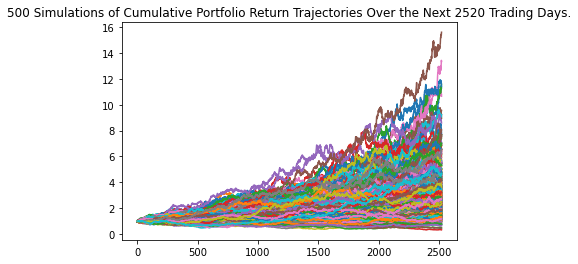

In [117]:
# Plot simulation outcomes
line_plot_ten_years = MC_10_90_ten_years.plot_simulation()

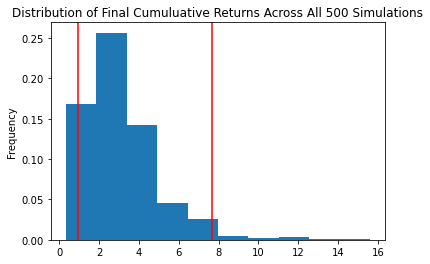

In [118]:
# Plot probability distribution and confidence intervals
line_plot_ten_years = MC_10_90_ten_years.plot_distribution()

In [119]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10_90_ten_years = MC_10_90_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_10_90_ten_years)

count           500.000000
mean              3.126520
std               1.920246
min               0.328384
25%               1.839431
50%               2.651743
75%               3.814428
max              15.611667
95% CI Lower      0.950085
95% CI Upper      7.690965
Name: 2520, dtype: float64


In [120]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_10_90_ten_years[8]*initial_investment,2)
ci_upper = round(tbl_10_90_ten_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19001.71 and $153819.31
